## Análisis gráfico

### Importación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import yaml
import os


### Warnings y display de la dataframe

In [2]:
pd.set_option("max_colwidth", 50)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [3]:
import warnings

warnings.filterwarnings("ignore")

### Importación de dataframes

In [4]:
directorio_actual = os.getcwd()

In [5]:
df = pd.read_csv(os.path.join(directorio_actual, '..', 'data','processed', 'df_venta.csv'))
df_num = pd.read_csv(os.path.join(directorio_actual, '..', 'data','processed', 'df_num_venta.csv'))

### Importación de modelos

In [6]:
directorio_actual = os.getcwd()

In [7]:
'''para cargar el modelo entrenado'''
with open(os.path.join(directorio_actual, '..', 'models','modelo_final_GBR_venta.pkl'), 'rb') as file:
    modelo_GBR_venta = pickle.load(file)

### Análisis de las variables

<Axes: >

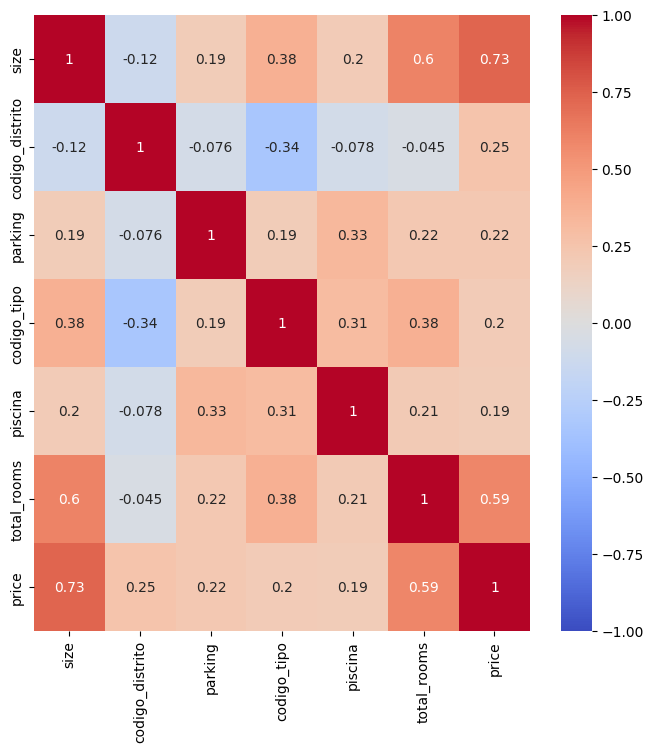

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),annot=True,vmin=-1,cmap='coolwarm')

In [9]:
tipo_vivienda = {1 : 'Estudio',2: 'Piso',3: 'Adosada',4: 'Duplex',5: 'Atico',6: 'Pareada',7: 'Independiente'}

In [10]:
df_num['tipo_vivienda'] = df_num['codigo_tipo'].map(tipo_vivienda)

In [11]:
df_num

,size,codigo_distrito,parking,codigo_tipo,piscina,total_rooms,price,tipo_vivienda
0,513.0,7,1,7,1,11,1195000.0,Independiente
1,94.0,60,0,2,0,5,350000.0,Piso
2,69.0,62,1,2,0,4,180000.0,Piso
3,110.0,59,1,2,0,4,119990.0,Piso
4,139.0,70,0,2,0,7,440000.0,Piso
...,...,...,...,...,...,...,...,...
1488,170.0,19,1,2,1,7,250000.0,Piso
1489,115.0,55,0,2,1,5,229000.0,Piso
1490,184.0,61,0,2,0,9,250000.0,Piso
1491,80.0,40,1,2,0,5,139900.0,Piso


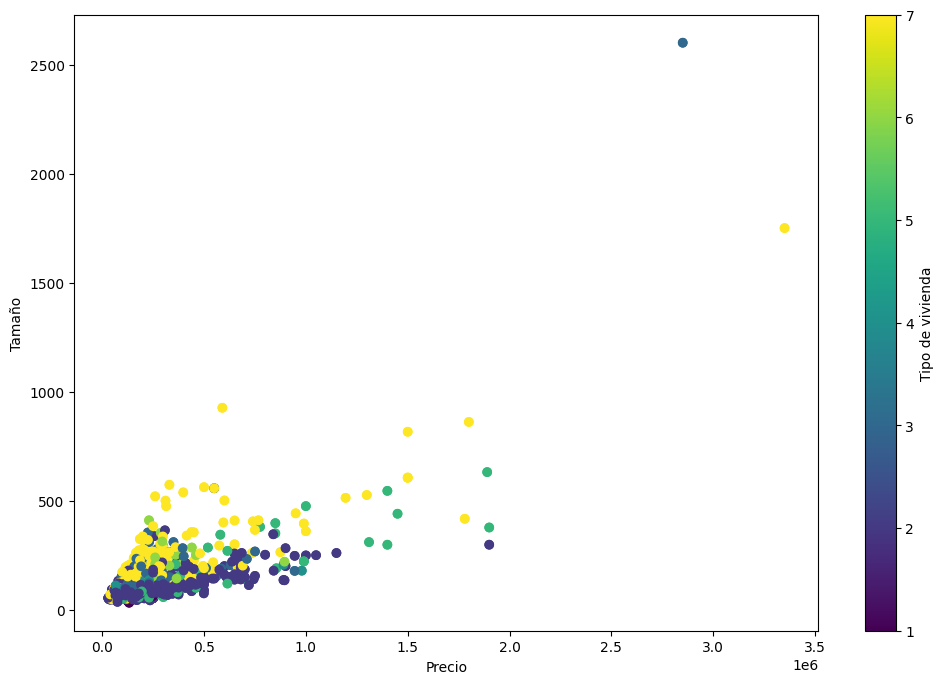

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(df_num['price'], df_num['size'], c=df_num['codigo_tipo'], cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Tamaño')
cbar = plt.colorbar(plt.scatter(df_num['price'], df_num['size'], c=df_num['codigo_tipo'], cmap='viridis'))
cbar.set_label('Tipo de vivienda')

En esta gráfica, analizamos la correlación de 2 variables, tipo de vivienda y tamaño y podemos ver que entre ambas y el precio, efectivamente existe correlación.

In [13]:
df[['precio_area / distrito','latitude','longitude',]]

,precio_area / distrito,latitude,longitude
0,2569.500000,37.365511,-6.062322
1,3157.322581,37.374507,-6.000352
2,2705.148148,37.353911,-5.974055
3,1895.750000,37.352886,-6.037541
4,2977.234694,37.384633,-5.978976
...,...,...,...
1488,1769.750000,37.370092,-6.086754
1489,1972.657895,37.404410,-5.938362
1490,1465.761905,37.400535,-5.957669
1491,1549.375000,37.416985,-5.972374


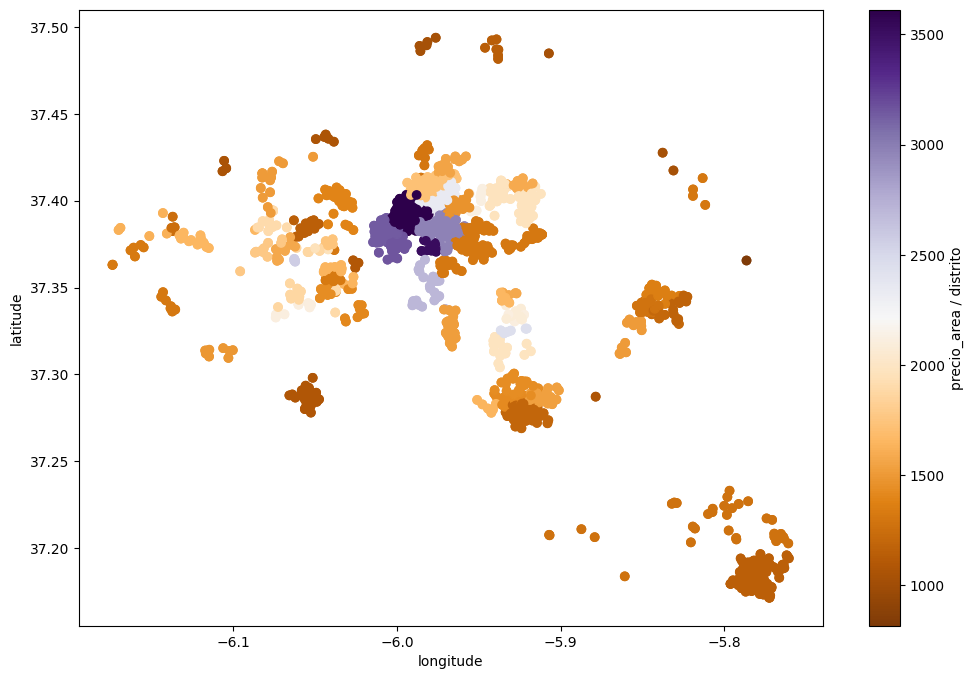

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['precio_area / distrito'], cmap='PuOr')
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar = plt.colorbar(plt.scatter(df['longitude'], df['latitude'], c=df['precio_area / distrito'], cmap='PuOr'))
cbar.set_label('precio_area / distrito')

En esta gráfica, donde analizamos el precio de area/distrito, vemos claramente que los distritos mas céntricos, tiene un precio/area mucho mas elevado. 

In [15]:
df_num

,size,codigo_distrito,parking,codigo_tipo,piscina,total_rooms,price,tipo_vivienda
0,513.0,7,1,7,1,11,1195000.0,Independiente
1,94.0,60,0,2,0,5,350000.0,Piso
2,69.0,62,1,2,0,4,180000.0,Piso
3,110.0,59,1,2,0,4,119990.0,Piso
4,139.0,70,0,2,0,7,440000.0,Piso
...,...,...,...,...,...,...,...,...
1488,170.0,19,1,2,1,7,250000.0,Piso
1489,115.0,55,0,2,1,5,229000.0,Piso
1490,184.0,61,0,2,0,9,250000.0,Piso
1491,80.0,40,1,2,0,5,139900.0,Piso


In [16]:
grupo_precios = df_num.groupby(['piscina', 'parking'])['price'].mean().reset_index()

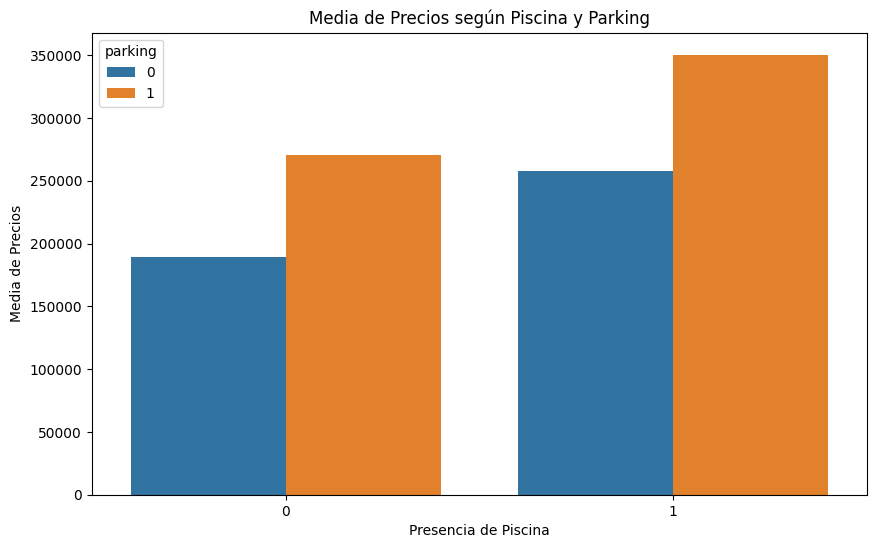

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='piscina', y='price', hue='parking', data=grupo_precios, ci=None)
plt.title('Media de Precios según Piscina y Parking')
plt.xlabel('Presencia de Piscina')
plt.ylabel('Media de Precios')
plt.show()

En este gráfico, si que podemos ver que tanto parking como piscina, influyen en el precio de la vivienda

### Análisis de las predicciones

In [18]:
X = df_num.drop(['price','tipo_vivienda'],axis=1)
y = df_num['price']

In [19]:
prediction = modelo_GBR_venta.predict(X)

In [20]:
analisis_prediction = pd.DataFrame({'test_real':y,'prediccion':prediction})

In [21]:
analisis_prediction['error'] = analisis_prediction['test_real'] - analisis_prediction['prediccion']


In [22]:
analisis_prediction = pd.concat([analisis_prediction,X], axis=1)

In [23]:
analisis_prediction.sort_values(by='error',ascending=False)

,test_real,prediccion,error,size,codigo_distrito,parking,codigo_tipo,piscina,total_rooms
881,499000.0,264440.965049,234559.034951,75.0,69,0,2,0,4
588,650636.0,472480.128837,178155.871163,163.0,70,0,2,0,6
31,500000.0,326818.301782,173181.698218,89.0,69,0,2,0,4
793,475000.0,324608.648582,150391.351418,120.0,62,0,2,1,4
918,895000.0,749411.259502,145588.740498,135.0,70,1,2,0,6
...,...,...,...,...,...,...,...,...,...
635,126000.0,224107.864057,-98107.864057,177.0,38,0,3,0,6
640,149000.0,250510.574118,-101510.574118,150.0,56,0,3,0,5
54,300000.0,404084.632506,-104084.632506,140.0,70,0,2,0,5
197,72501.0,183803.861610,-111302.861610,119.0,11,0,7,0,6


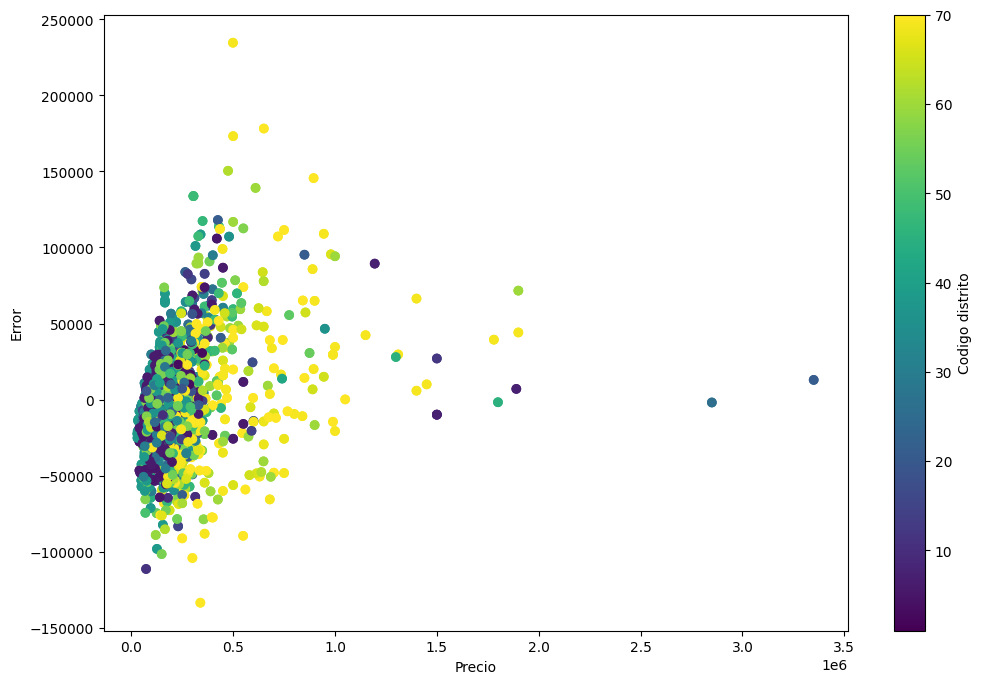

In [24]:
plt.figure(figsize=(12, 8))
plt.scatter(analisis_prediction['test_real'], analisis_prediction['error'], c=analisis_prediction['codigo_distrito'], cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Error')
cbar = plt.colorbar(plt.scatter(analisis_prediction['test_real'], analisis_prediction['error'], c=analisis_prediction['codigo_distrito'], cmap='viridis'))
cbar.set_label('Codigo distrito')

En esta gráfica, donde analizamos los errores de las predicciones obtenidas,vemos que los errores mas significativos son en distritos donde el precio medio/area es mucho más elevado, seguramente céntricos, donde habría que analizar que tipo de viviendas son, ya que pueden ser viviendas de lujos cuyos precios se disparan y en ese caso estaríamos hablando de outliers de los cuales prescindiríamos. También si llevan mucho tiempo en venta o si le han puesto un precio mas bajo debido a la necesidad de vender.